In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from shapely import wkt
import time

## We are going to explore Datasets from the [Open Data Österreich](https://www.data.gv.at/suche/)

### First we will explore water fountains  
Trinkbrunnen Standorte Wien data from [here](https://www.data.gv.at/katalog/dataset/2ed52078-7e55-40ea-8036-0d89118a06f4)

In [2]:
url1 = "https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:TRINKBRUNNENOGD&srsName=EPSG:4326&outputFormat=csv"

df1 = pd.read_csv(url1, encoding='utf8')
df1['geometry'] = df1['SHAPE'].apply(wkt.loads)
df1.drop(['SHAPE'], axis=1, inplace=True)

In [3]:
#gdf1 = gpd.GeoDataFrame(df1, crs='epsg:4326')
#gdf1 = gdf1.to_crs("+proj=cea +units=m")

gdf1 = gpd.GeoDataFrame(df1, crs='epsg:3857')

#### Checking the columns of the dataset

In [4]:
gdf1.head()

,FID,OBJECTID,BASIS_TYP_TXT,BASIS_TYP,SE_ANNO_CAD_DATA,geometry
0,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3330,3169101,Trinkbrunnen mit Tränke,5,NaN,POINT (16.418 48.183)
1,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3331,3169102,Trinkbrunnen mit Tränke,5,NaN,POINT (16.418 48.182)
2,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3332,3169103,Trinkbrunnen mit Tränke,5,NaN,POINT (16.381 48.178)
3,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3333,3169104,Trinkbrunnen mit Tränke,5,NaN,POINT (16.383 48.179)
4,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3334,3169105,Trinkbrunnen mit Tränke,5,NaN,POINT (16.386 48.292)


In [5]:
gdf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   FID               1740 non-null   object  
 1   OBJECTID          1740 non-null   int64   
 2   BASIS_TYP_TXT     1740 non-null   object  
 3   BASIS_TYP         1740 non-null   int64   
 4   SE_ANNO_CAD_DATA  0 non-null      float64 
 5   geometry          1740 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(2)
memory usage: 81.7+ KB


#### Checking the Projection of the coordinates

In [6]:
gdf1.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Plotting the map right away from the geometry

<AxesSubplot:>

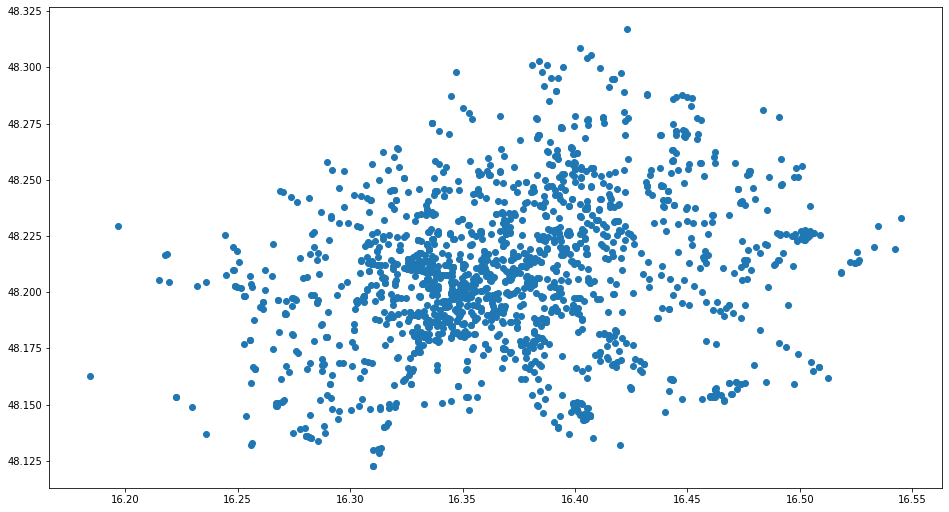

In [7]:
fig,ax = plt.subplots(figsize=(16,16))
gdf1.plot(ax=ax)

#### Adding a contextualized basemap

In [8]:
# OpenStreetMap

#map = folium.Map(crs='EPSG4326', tiles='OpenStreetMap', location = [27.585,-81.8155], zoom_start = 13)
m = folium.Map(location = [48.20,16.40], tiles='OpenStreetMap' , zoom_start = 11)
m

#### Now, plotting the same map with the information from the geodataframe

In [9]:
# OpenStreetMap

#map = folium.Map(crs='EPSG4326', tiles='OpenStreetMap', location = [27.585,-81.8155], zoom_start = 13)

m = folium.Map(location = [48.20,16.40], tiles='OpenStreetMap' , zoom_start = 11)
trkbrunnen = [[point.xy[1][0], point.xy[0][0]] for point in gdf1.geometry ]
for coord in trkbrunnen:
    m.add_child(folium.Marker(location = coord))

m

### Now let's make an analysis per Bezirk

Katalog
Bezirksgrenzen Wien from [here:](https://www.data.gv.at/katalog/dataset/stadt-wien_bezirksgrenzenwien)

In [10]:
time.sleep(10)
url2 = "https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:BEZIRKSGRENZEOGD&srsName=EPSG:4326&outputFormat=csv"
df2 = pd.read_csv(url2, encoding='utf8')
df2['geometry'] = df2['SHAPE'].apply(wkt.loads)
df2.drop(['SHAPE'], axis=1, inplace=True)

In [11]:
gdf2 = gpd.GeoDataFrame(df2, crs='epsg:3857')
gdf2.head()

,FID,NAMEK,BEZNR,BEZ_RZ,NAMEK_NUM,NAMEK_RZ,NAMEG,LABEL,BEZ,DISTRICT_CODE,STATAUSTRIA_BEZ_CODE,STATAUSTRIA_GEM_CODE,FLAECHE,UMFANG,AKT_TIMESTAMP,SE_SDO_ROWID,SE_ANNO_CAD_DATA,geometry
0,BEZIRKSGRENZEOGD.11207,Rudolfsheim-Fünfhaus,15,XV,"15., Rudolfsheim-Fünfhaus",XV. Rudolfsheim-Fünfhaus,RUDOLFSHEIM-FÜNFHAUS,XV.,15,1150,915,91501,3.918463e+06,9713.17,2022-02-16,11207,NaN,"POLYGON ((16.327 48.205, 16.325 48.205, 16.324..."
1,BEZIRKSGRENZEOGD.11208,Neubau,7,VII,"7., Neubau",VII. Neubau,NEUBAU,VII.,7,1070,907,90701,1.608248e+06,5312.54,2022-02-16,11208,NaN,"POLYGON ((16.339 48.209, 16.338 48.209, 16.338..."
2,BEZIRKSGRENZEOGD.11209,Landstraße,3,III,"3., Landstraße",III. Landstraße,LANDSTRASSE,III.,3,1030,903,90301,7.403077e+06,13962.28,2022-02-16,11209,[B@5281b69f,"POLYGON ((16.397 48.207, 16.397 48.208, 16.397..."
3,BEZIRKSGRENZEOGD.11210,Josefstadt,8,VIII,"8., Josefstadt",VIII. Josefstadt,JOSEFSTADT,VIII.,8,1080,908,90801,1.089946e+06,4170.30,2022-02-16,11210,NaN,"POLYGON ((16.349 48.215, 16.349 48.215, 16.349..."
4,BEZIRKSGRENZEOGD.11211,Innere Stadt,1,I,"1., Innere Stadt",I. Innere Stadt,INNERE STADT,I.,1,1010,901,90101,2.868774e+06,6972.75,2022-02-16,11211,NaN,"POLYGON ((16.373 48.217, 16.372 48.217, 16.372..."


In [12]:
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   FID                   23 non-null     object  
 1   NAMEK                 23 non-null     object  
 2   BEZNR                 23 non-null     int64   
 3   BEZ_RZ                23 non-null     object  
 4   NAMEK_NUM             23 non-null     object  
 5   NAMEK_RZ              23 non-null     object  
 6   NAMEG                 23 non-null     object  
 7   LABEL                 23 non-null     object  
 8   BEZ                   23 non-null     int64   
 9   DISTRICT_CODE         23 non-null     int64   
 10  STATAUSTRIA_BEZ_CODE  23 non-null     int64   
 11  STATAUSTRIA_GEM_CODE  23 non-null     int64   
 12  FLAECHE               23 non-null     float64 
 13  UMFANG                23 non-null     float64 
 14  AKT_TIMESTAMP         23 non-null     object  
 15  

#### Plotting the map right away from the geometry

<AxesSubplot:>

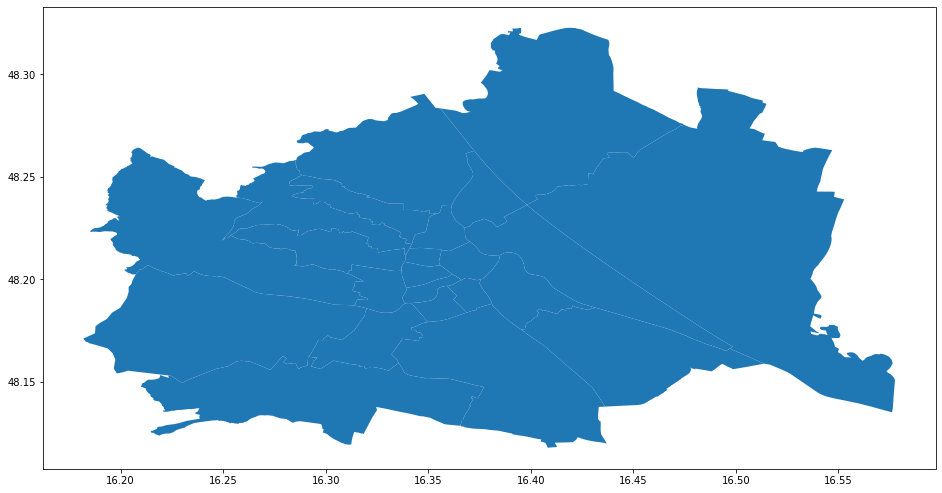

In [13]:
fig,ax = plt.subplots(figsize=(16,16))
gdf2.plot(ax=ax)

### Using Data from both Geodataframes

#### How many fountains in each Bezirk?

In [14]:
for idx in gdf2.index:
    print(gdf2.loc[idx,"NAMEK"], gdf1[gdf1.geometry.within(gdf2.loc[idx,"geometry"])].size)

Rudolfsheim-Fünfhaus 408
Neubau 360
Landstraße 474
Josefstadt 120
Innere Stadt 378
Ottakring 594
Alsergrund 198
Leopoldstadt 744
Währing 258
Hernals 300
Brigittenau 330
Penzing 390
Döbling 420
Donaustadt 1380
Floridsdorf 876
Favoriten 750
Wieden 198
Liesing 354
Simmering 456
Meidling 456
Margareten 264
Mariahilf 372
Hietzing 336


#### Choosing just one Bezirk

<AxesSubplot:>

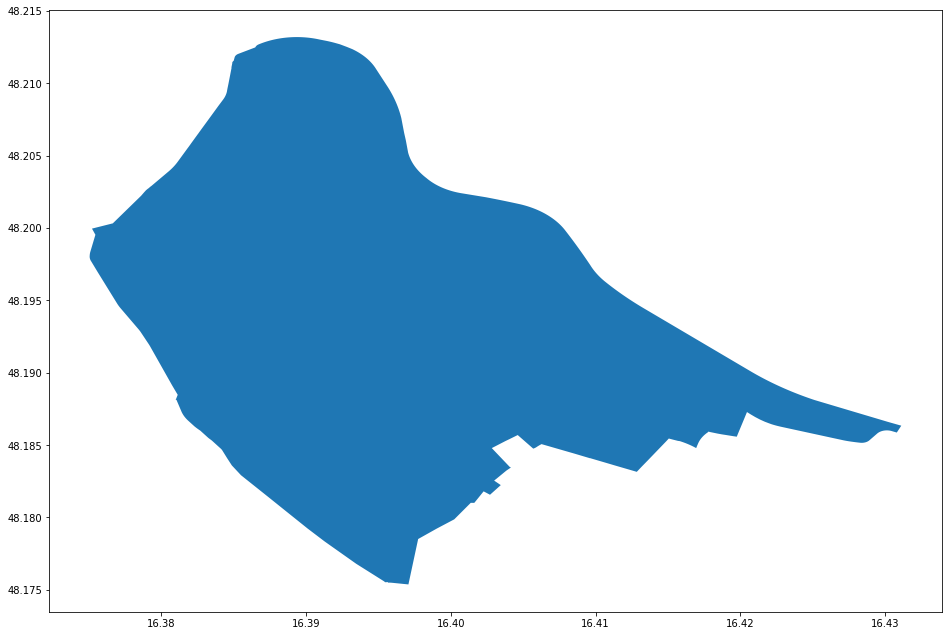

In [15]:
fig,ax = plt.subplots(figsize=(16,16))
gdf2[gdf2.BEZNR == 3].plot(ax=ax)

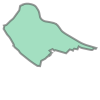

In [16]:
landstrasse = gdf2[gdf2.BEZNR == 3].geometry
landstrasse.values[0]

In [17]:
trkbrunnen3 = gdf1[gdf1.geometry.within(landstrasse.values[0])]
trkbrunnen3

,FID,OBJECTID,BASIS_TYP_TXT,BASIS_TYP,SE_ANNO_CAD_DATA,geometry
8,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3338,3169109,Grundwasserbrunnen,1,NaN,POINT (16.403 48.188)
21,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3345,3169122,Trinkbrunnen mit Tränke,5,NaN,POINT (16.392 48.192)
22,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3346,3169123,Trinkbrunnen mit Tränke,5,NaN,POINT (16.394 48.190)
24,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3348,3169125,Trinkbrunnen,4,NaN,POINT (16.403 48.188)
34,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3352,3169135,Trinkbrunnen mit Tränke,5,NaN,POINT (16.376 48.199)
...,...,...,...,...,...,...
1662,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_39ae,3170370,Trinkhydrant mit Tränke,18,NaN,POINT (16.400 48.198)
1668,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_39b4,3170376,Trinkhydrant mit Tränke,18,NaN,POINT (16.391 48.193)
1697,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_39d1,3170405,Trinkhydrant mit Tränke,18,NaN,POINT (16.401 48.191)
1708,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_39dc,3170416,Trinkhydrant mit Tränke,18,NaN,POINT (16.399 48.192)


In [18]:
trkbrunnen3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 79 entries, 8 to 1711
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   FID               79 non-null     object  
 1   OBJECTID          79 non-null     int64   
 2   BASIS_TYP_TXT     79 non-null     object  
 3   BASIS_TYP         79 non-null     int64   
 4   SE_ANNO_CAD_DATA  0 non-null      float64 
 5   geometry          79 non-null     geometry
dtypes: float64(1), geometry(1), int64(2), object(2)
memory usage: 4.3+ KB


#### Examining the types of Fountains

In [19]:
trkbrunnen3.BASIS_TYP_TXT.value_counts()

Trinkbrunnen mit Tränke                        20
Trinkbrunnen                                   15
Trinkhydrant mit Tränke                        14
Zierbrunnen                                     8
Sprühnebeldusche                                5
Mobiler Trinkbrunnen mit Sprühnebelfunktion     5
Grundwasserbrunnen                              3
Auslaufbrunnen                                  3
Spielbrunnen                                    2
Auslaufbrunnen mit Tränke                       2
Trinkhydrant                                    2
Name: BASIS_TYP_TXT, dtype: int64

In [20]:
trkbrunnen3 = trkbrunnen3[trkbrunnen3.BASIS_TYP_TXT == "Trinkbrunnen mit Tränke"]
trkbrunnen3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 21 to 1316
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   FID               20 non-null     object  
 1   OBJECTID          20 non-null     int64   
 2   BASIS_TYP_TXT     20 non-null     object  
 3   BASIS_TYP         20 non-null     int64   
 4   SE_ANNO_CAD_DATA  0 non-null      float64 
 5   geometry          20 non-null     geometry
dtypes: float64(1), geometry(1), int64(2), object(2)
memory usage: 1.1+ KB


In [21]:
# OpenStreetMap
m = folium.Map(location = [48.20,16.40], tiles='OpenStreetMap' , zoom_start = 14)


trkbrunnen3p = [[point.xy[1][0], point.xy[0][0]] for point in trkbrunnen3.geometry]
for coord in trkbrunnen3p:
    m.add_child(folium.Marker(location = coord))

m

#### Hiking Routes

https://www.data.gv.at/katalog/dataset/60dd8dfc-3858-4096-b2df-544db8120827

In [22]:
url3 = "https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:WANDERWEGLAINZOGD&srsName=EPSG:4326&outputFormat=csv"
df3 = pd.read_csv(url3, encoding='utf8')
df3['geometry'] = df3['SHAPE'].apply(wkt.loads)
df3.drop(['SHAPE'], axis=1, inplace=True)

In [23]:
gdf3 = gpd.GeoDataFrame(df3, crs='epsg:3857')
gdf3.head()

,FID,OBJECTID,BEZEICHNUNG,BESCHREIBUNG,WEBLINK1,SE_ANNO_CAD_DATA,geometry
0,WANDERWEGLAINZOGD.fid--5447af80_18102e58f9e_39fc,114103,Naturerlebnis Lainzer Tiergarten - Wege im Nat...,Angebotene Wege im Naturschutzgebiet Lainzer T...,http://www.wien.gv.at/umwelt/wald/freizeit/wan...,NaN,"LINESTRING (16.224 48.185, 16.224 48.185, 16.2..."
1,WANDERWEGLAINZOGD.fid--5447af80_18102e58f9e_39fd,114120,Naturerlebnis Lainzer Tiergarten - Wege im Nat...,Angebotene Wege im Naturschutzgebiet Lainzer T...,http://www.wien.gv.at/umwelt/wald/freizeit/wan...,NaN,"LINESTRING (16.238 48.195, 16.238 48.194, 16.2..."
2,WANDERWEGLAINZOGD.fid--5447af80_18102e58f9e_39fe,114121,Naturerlebnis Lainzer Tiergarten - Wege im Nat...,Angebotene Wege im Naturschutzgebiet Lainzer T...,http://www.wien.gv.at/umwelt/wald/freizeit/wan...,NaN,"LINESTRING (16.253 48.198, 16.253 48.198)"
3,WANDERWEGLAINZOGD.fid--5447af80_18102e58f9e_39ff,114122,Naturerlebnis Lainzer Tiergarten - Wege im Nat...,Angebotene Wege im Naturschutzgebiet - Naturer...,http://www.wien.gv.at/umwelt/wald/erholung/lai...,NaN,"LINESTRING (16.238 48.195, 16.238 48.195, 16.2..."
4,WANDERWEGLAINZOGD.fid--5447af80_18102e58f9e_3a00,114123,Naturerlebnis Lainzer Tiergarten - Wege im Nat...,Angebotene Wege im Naturschutzgebiet Lainzer T...,http://www.wien.gv.at/umwelt/wald/freizeit/wan...,NaN,"LINESTRING (16.232 48.179, 16.232 48.178, 16.2..."


In [24]:
gdf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   FID               1740 non-null   object  
 1   OBJECTID          1740 non-null   int64   
 2   BASIS_TYP_TXT     1740 non-null   object  
 3   BASIS_TYP         1740 non-null   int64   
 4   SE_ANNO_CAD_DATA  0 non-null      float64 
 5   geometry          1740 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(2)
memory usage: 81.7+ KB


<AxesSubplot:>

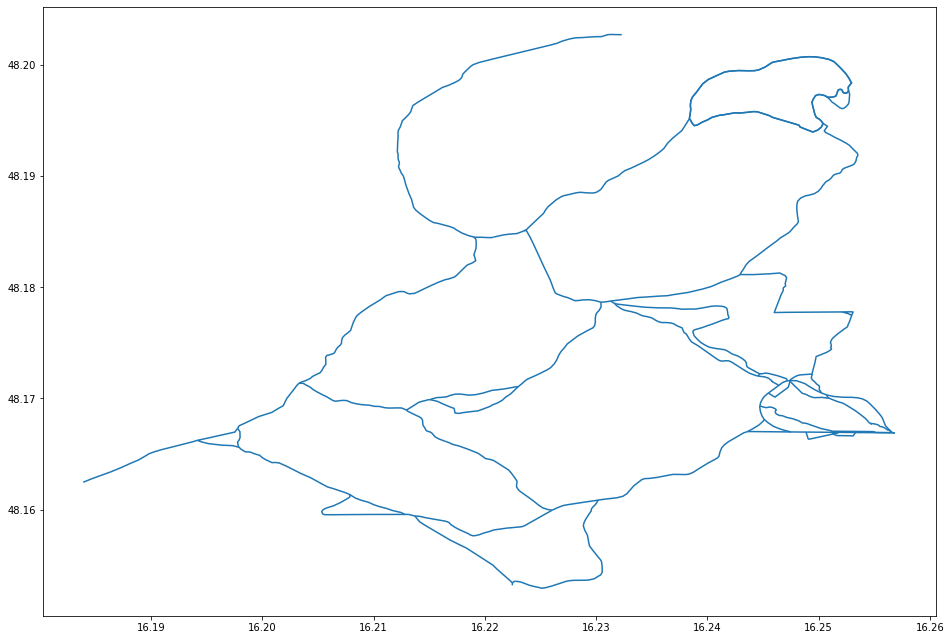

In [25]:
fig,ax = plt.subplots(figsize=(16,16))
gdf3.plot(ax=ax)

#### Plotting lines with Folium
https://stackoverflow.com/questions/70386381/plotting-linestrings-with-a-colomap-geopandas-and-folium

In [26]:
m = folium.Map(location = [48.18,16.24], tiles='OpenStreetMap' , zoom_start = 13)

for idx in gdf3.index:
    geo_j = gpd.GeoSeries(gdf3.loc[idx,'geometry']).to_json()
    geo_j = folium.GeoJson(data=geo_j,)
    geo_j.add_to(m)
m

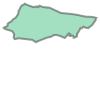

In [27]:
hietzing = gdf2[gdf2.BEZNR == 13].geometry
hietzing.values[0]

In [28]:
trkbrunnen13 = gdf1[gdf1.geometry.within(hietzing.values[0])]
trkbrunnen13.head()

,FID,OBJECTID,BASIS_TYP_TXT,BASIS_TYP,SE_ANNO_CAD_DATA,geometry
63,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_336f,3169164,Trinkbrunnen,4,NaN,POINT (16.276 48.174)
64,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3370,3169165,Trinkbrunnen,4,NaN,POINT (16.273 48.165)
83,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3383,3169184,Trinkbrunnen,4,NaN,POINT (16.272 48.190)
84,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_3384,3169185,Trinkbrunnen,4,NaN,POINT (16.282 48.168)
205,TRINKBRUNNENOGD.fid--5447af80_18102e58f9e_33fd,3169306,Trinkbrunnen,4,NaN,POINT (16.258 48.166)


In [29]:
m = folium.Map(location = [48.18,16.24], tiles='OpenStreetMap' , zoom_start = 13)

trkbrunnen13p = [[point.xy[1][0], point.xy[0][0]] for point in trkbrunnen13.geometry]
for coord in trkbrunnen13p:
    m.add_child(folium.Marker(location = coord))


for idx in gdf3.index:
    geo_j = gpd.GeoSeries(gdf3.loc[idx,'geometry']).to_json()
    geo_j = folium.GeoJson(data=geo_j,)
    geo_j.add_to(m)
m

#### Importanting reading about correcting areas with another CRS
https://gis.stackexchange.com/questions/365400/problem-getting-correct-area-for-polygon-and-choosing-a-crs  
https://python-visualization.github.io/folium/modules.html  